In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics
from scipy import stats
from sklearn import preprocessing
import math

%matplotlib inline

In [4]:
# Read all .csv files to data relevant frames
# df_pubs = pd.read_csv("open_pubs.csv")
# df_crimes = pd.read_csv("london_crime_by_lsoa.csv")
# df_borough_demographics = pd.read_csv("london-borough-profiles-2016 Data set.csv")

df_borough_demographics


,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,...,5.99,5.57,n/a,2.6,128.8,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,"205,773","76,841","3,610.8",57.3,32.9,21.0,...,7.05,3.05,25.3,7.3,227.6,Lab,0.0,100.0,0.0,36.5
3,E09000003,E09000003,Barnet,Outer London,"385,108","149,147","8,674.8",44.5,37.2,21.0,...,7.37,2.75,18.4,6.0,133.8,Cons,50.8,47.6,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,"243,303","97,233","6,058.1",39.9,38.9,20.8,...,7.21,3.29,21.4,6.9,164.3,Cons,71.4,23.8,0.0,39.6
5,E09000005,E09000005,Brent,Outer London,"328,568","119,166","4,323.3",76.1,35.5,20.1,...,7.22,2.92,23.9,7.9,169.4,Lab,9.5,88.9,1.6,36.3
6,E09000006,E09000006,Bromley,Outer London,"326,560","139,654","15,013.5",21.7,40.1,15.8,...,7.44,3.26,16.5,5.2,148.5,Cons,85.0,11.7,0.0,40.8
7,E09000007,E09000007,Camden,Inner London,"240,595","106,518","2,178.9",109.8,36.2,8.8,...,7.11,3.61,20.8,3.9,163.8,Lab,22.2,74.1,1.9,38.7
8,E09000008,E09000008,Croydon,Outer London,"383,408","156,979","8,650.4",44.4,36.9,22.3,...,7.18,3.30,23.8,6.5,178.2,Lab,42.9,57.1,0.0,38.6
9,E09000009,E09000009,Ealing,Outer London,"348,533","130,934","5,554.4",63.5,36.1,21.2,...,7.26,3.57,23.3,6.9,163.5,Lab,17.4,76.8,5.8,41.2


In [207]:
# Find the poorer boroughs
gap_list_original = df_borough_demographics['Gross Annual Pay, (2015)'].dropna().tolist()
print('gap_list_original', gap_list_original)

gap_list = []
for gap_amount in gap_list_original:
    if (gap_amount != '.'):
        int_gap_amount = int(gap_amount[1:].replace(',',''))
        gap_list.append(int_gap_amount)

print('gap_list', gap_list)

size_of_all_boroughs = len(gap_list)
print('size_of_all_boroughs: ' + str(size_of_all_boroughs))


median_gap = statistics.median(gap_list)
print('median_gap: ' + str(median_gap))

poor_borough_gaps = []
poor_borough_gaps = [x for x in gap_list if x <= median_gap]
poor_borough_gaps = ['\xa3' + str(x)[:2] + ',' + str(x)[2:] for x in poor_borough_gaps]
print('poor_borough_gaps', poor_borough_gaps)

size_of_poor_boroughs = len(poor_borough_gaps)
print('size_of_poor_boroughs', size_of_poor_boroughs)

df_poor_borough_demographics = df_borough_demographics.loc[df_borough_demographics["Gross Annual Pay, (2015)"].isin(poor_borough_gaps)]
print('df_poor_borough_demographics[\'Gross Annual Pay, (2015)\']', df_poor_borough_demographics['Area name'])

gap_list_original ['.', '£28,428', '£33,084', '£32,040', '£29,777', '£36,498', '£39,610', '£32,887', '£28,978', '£31,094', '£31,757', '£32,199', '£38,029', '£30,931', '£32,529', '£32,274', '£32,989', '.', '£35,476', '.', '£36,767', '£33,341', '£31,783', '£33,122', '£27,174', '£35,665', '£39,563', '£34,537', '£31,387', '£34,849', '£29,532', '£39,562', '£42,798', '.', '.', '£33,203', '£27,869', '£27,645', '£27,869']
gap_list [28428, 33084, 32040, 29777, 36498, 39610, 32887, 28978, 31094, 31757, 32199, 38029, 30931, 32529, 32274, 32989, 35476, 36767, 33341, 31783, 33122, 27174, 35665, 39563, 34537, 31387, 34849, 29532, 39562, 42798, 33203, 27869, 27645, 27869]
size_of_all_boroughs: 34
median_gap: 32708.0
poor_borough_gaps ['£28,428', '£32,040', '£29,777', '£28,978', '£31,094', '£31,757', '£32,199', '£30,931', '£32,529', '£32,274', '£31,783', '£27,174', '£31,387', '£29,532', '£27,869', '£27,645', '£27,869']
size_of_poor_boroughs 17
df_poor_borough_demographics['Gross Annual Pay, (2015)'] 2

In [208]:
# Use the poor boroughs
df_borough_demographics = df_poor_borough_demographics

# # Drop null values from borough demographics data frame
# df_borough_demographics.dropna(inplace=True) 

# Slice borough names
df_london_boroughs = df_borough_demographics[['Area name']]
print(df_london_boroughs)

# Get list of boroughs in London to an array(list)
borough_list = df_london_boroughs['Area name'].tolist()
df_pubs = df_pubs.rename(columns={'local_authority':'borough'})

# Select all pubs from London, based on the borough names in London
df_london_pubs = df_pubs.loc[df_pubs["borough"].isin(borough_list)]
print ("Pubs that are located in London boroughs:")
df_london_pubs.head()

               Area name
2   Barking and Dagenham
4                 Bexley
5                  Brent
9                 Ealing
10               Enfield
11             Greenwich
12               Hackney
14              Haringey
15                Harrow
16              Havering
23              Lewisham
25                Newham
29                Sutton
31        Waltham Forest
37               England
38        United Kingdom
39   National comparator
Pubs that are located in London boroughs:


,fas_id,name,address,postcode,easting,northing,latitude,longitude,borough
8958,83420,Aria Bar,"31 Longbridge Road, Barking",IG11 8TN,544481,184425.0,51.54024,0.081962,Barking and Dagenham
8959,83454,Barking Arms Ltd,"25-27 Station Parade, Barking",IG11 8TU,544404,184344.0,51.539531,0.080819,Barking and Dagenham
8960,83461,Barking football Club,"Barking Football Club, Lodge Avenue, Dagenham",RM8 2JR,546614,185058.0,51.545377,0.11296,Barking and Dagenham
8961,83464,Barking Indoor Bowls Club Ltd,"Indoor Bowls Hall, Barking Prk, Longbridge Roa...",IG11 8TA,544692,184653.0,51.542225,0.085096,Barking and Dagenham
8962,83470,Barking Rugby Union Football Club,"Gale Street, Dagenham",RM9 4TX,547647,183924.0,51.53492,0.127357,Barking and Dagenham


In [209]:
df_pub_count_per_borough = df_london_pubs.groupby("borough").nunique()
df_pub_count_per_borough = df_pub_count_per_borough[["fas_id"]]
df_pub_count_per_borough = df_pub_count_per_borough.rename(columns={'fas_id':'pub_count'})
print (df_pub_count_per_borough.head(), '\n')

df_crimes_per_borough = df_crimes.groupby("borough").count()
df_crimes_per_borough = df_crimes_per_borough [['lsoa_code']]
df_crimes_per_borough = df_crimes_per_borough.rename(columns={'lsoa_code':'crime_count'})
print (df_crimes_per_borough.head())

                      pub_count
borough                        
Barking and Dagenham         41
Bexley                      125
Brent                       105
Ealing                      151
Enfield                     175 

                      crime_count
borough                          
Barking and Dagenham       311040
Barnet                     572832
Bexley                     385668
Brent                      490644
Bromley                    523908


In [210]:
# Combine data frames
df_pubs_crimes = df_crimes_per_borough.join(df_pub_count_per_borough)
df_pubs_crimes.dropna(inplace=True)
# print(df_pubs_crimes.head(), '\n')

# Create a pub count/crime count ratio variabl, and normalize it
df_pubs_crimes['pc_ratio'] = df_pubs_crimes.apply(lambda row: row.pub_count / row.crime_count, axis=1)
max_value = df_pubs_crimes['pc_ratio'].max()
min_value = df_pubs_crimes['pc_ratio'].min()
df_pubs_crimes['pc_ratio_norm'] = (df_pubs_crimes['pc_ratio'] - min_value) / (max_value - min_value)

df_pubs_crimes

,crime_count,pub_count,pc_ratio,pc_ratio_norm
borough,,,,
Barking and Dagenham,311040,41.0,0.000132,0.086364
Bexley,385668,125.0,0.000324,0.603456
Brent,490644,105.0,0.000214,0.307371
Ealing,549396,151.0,0.000275,0.470979
Enfield,511164,175.0,0.000342,0.652511
Greenwich,421200,122.0,0.000290,0.510780
Hackney,417744,197.0,0.000472,1.000000
Haringey,413856,98.0,0.000237,0.368662
Harrow,365688,85.0,0.000232,0.356941


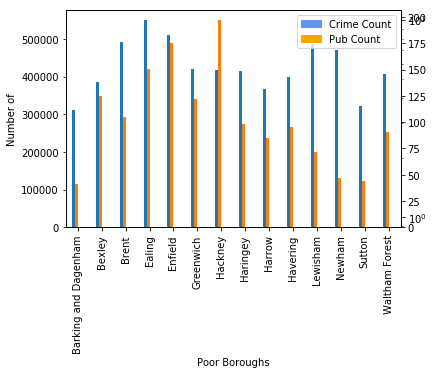

In [211]:
# Print data frame as bar-graph
ax = df_pubs_crimes.plot(secondary_y='pub_count', rot=90, kind='bar')

# Set Legend labels with 'patch'
crime_patch = mpatches.Patch(color='cornflowerblue', label='Crime Count')
pub_patch = mpatches.Patch(color='orange', label='Pub Count')
ax.legend(handles=[crime_patch,pub_patch], loc=1)

ax.set_xlabel('Poor Boroughs')
ax.set_ylabel('Number of')

ax.set_xticklabels(borough_list)
ax2 = ax.twinx()
ax2.set_yscale('log')

plt.show()

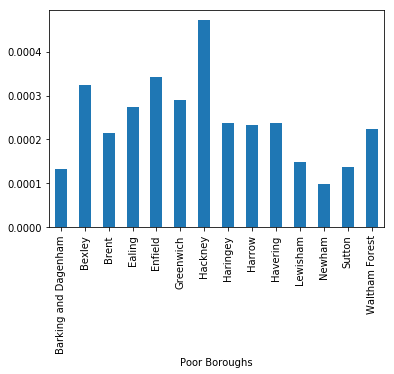

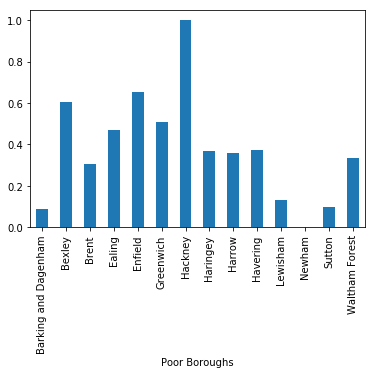

0.2651176738491869

In [212]:
ax = df_pubs_crimes['pc_ratio'].plot(kind='bar')
ax.set_xlabel('Poor Boroughs')
plt.show()
ax = df_pubs_crimes['pc_ratio_norm'].plot(kind='bar')
ax.set_xlabel('Poor Boroughs')
plt.show()

# statistics.mean(df_pubs_crimes['pc_ratio_norm'])
statistics.stdev(df_pubs_crimes['pc_ratio_norm'])

In [213]:
statistics.stdev(df_pubs_crimes['pc_ratio_norm'])/math.sqrt(len(df_pubs_crimes))

0.07085567876586676